## Labling the real data

#### We want to leverage the links we used to extract our data to modulirizing them based on the links that was categorized by the Wikipedia website

In [98]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopWords = stopwords.words('english')

import os
import re
import csv
import numpy as np
import csv 

##### Creating a dictionary of the wikipedia link of the disease as key with all the diseases that are presented within the link as values

In [359]:
indicies = [0,1,2,3,5,8,16]
link_name = []
dict = {elem: i for elem, i in zip([urls[index].split('wiki/')[-1].replace('_', ' ') for index in indicies], range(1,len(indicies)+1))}

In [360]:
dict.update({ 'Heart_disorders': 8})
dict

{'List of autoimmune diseases': 1,
 'List of cancer types': 2,
 'List of childhood diseases and disorders': 3,
 'Endocrine disease#List of diseases': 4,
 'Eye disease': 5,
 'List of human disease case fatality rates': 6,
 'List of genetic disorders': 7,
 'Heart_disorders': 8}

#### Reading from csv file which includes link category with the corresponding disease names within the link

In [341]:
df = pd.read_csv('preprocessed_data.csv')
samples = pd.read_csv('type-conditions-data1.csv')

In [343]:
index = 10
for i in range(len(samples['disease']) - 1):
    dict.update({samples.iloc[i, 0]:index})
    index+=1

#### Mapping the real link categories into numerical labels

In [344]:
dict

{'List of autoimmune diseases': 1,
 'List of cancer types': 2,
 'List of childhood diseases and disorders': 3,
 'Endocrine disease#List of diseases': 4,
 'Eye disease': 5,
 'List of human disease case fatality rates': 6,
 'List of genetic disorders': 7,
 'Heart_disorders': 9,
 'Infectious_diseases': 8,
 'Liver_Disease': 10,
 'Neurological_Conditions': 11,
 'Mental_Conditions': 12,
 'voice_disorders': 13,
 'Sexual_Infection': 14,
 'Gastro_Intestinal': 15,
 'Muscular_disorders': 16,
 'skin_conditions': 17,
 'Hematological_disorders': 18,
 'Autoinmune_diseases': 19,
 'Cancer_Types': 20,
 'childhood_disorders': 21,
 'Endocrine_diseases': 22,
 'Eponymus_diseases': 23,
 'eye_disorders': 24}

#### Defining a list of diseases' list to compare the disease inside csv file with the real extracted diseases to add the respective label to each specific disease  

In [350]:
disease_lists = []
disease_list = []

for vals in samples['symptoms']:
    disease_list = []
    vals = vals.split(',')
    for v in vals:
        v = v.lower()
        v = re.sub('_', ' ', v)
        cleaned_key = ''.join([char for char in v if char.isalpha() or char.isspace()])
        words = word_tokenize(cleaned_key)
        stemmed_words = [lemmatizer.lemmatize(word) for word in words]
        disease_list.append(' '.join(w for w in stemmed_words))
    disease_lists.append(disease_list)


In [351]:
disease_lists

[['metabolic dysfunctionassociated steatotic liver disease',
  'fasciolosis',
  'hepatitis',
  'autoimmune hepatitis',
  'alcohol abuse',
  'fatty liver disease',
  'cirrhosis',
  'metabolic syndrome',
  'wilson disease',
  'alpha antitrypsin deficiency',
  'gilbert syndrome',
  'jaundice',
  'liver failure',
  'liver cancer',
  'cholangiocarcinoma',
  'angiosarcoma',
  'primary biliary cholangitis',
  'inflammation',
  'hepatic encephalopathy',
  'allergy'],
 ['achromatopsia',
  'alcoholism',
  'alzheimers disease',
  'amaurosis fugax',
  'al',
  'intracranial aneurysm',
  'angelman syndrome',
  'asperger syndrome',
  'ataxia',
  'attention deficit hyperactivity disorder',
  'autism spectrum',
  'behçets disease',
  'bell palsy',
  'bipolar disorder',
  'visual impairment',
  'head injury',
  'brain tumor',
  'capgras delusion',
  'carpal tunnel syndrome',
  'complex regional pain syndrome',
  'arteriosclerosis',
  'cadasil',
  'cerebral palsy',
  'charcotmarietooth disease',
  'myalg

#### Creating a column for real labels name 'Module'

In [ ]:
df['module'] = None

#### Adding the labels to the corresponding disease names

In [354]:
for i in range(len(disease_lists) -1):
    for key in disease_lists[i]:
        indicies = df[df['disease'] == key].index
        df.iloc[indicies, 2] = i+10


#### Disease with their real labels

In [355]:
df

,disease,symptoms,modules
0,metabolic dysfunctionassociated steatotic live...,asymptomaticin early stagesin later stagesdepo...,10.0
1,fasciolosis,abdominal pain nausea yellow skin,8.0
2,hepatitis,yellowish skin poor appetite abdominal pain,10.0
3,autoimmune hepatitis,oftenasymptomatic fatigue right upper abdomina...,19.0
4,alcohol abuse,relationship difficulty legal problem problem ...,10.0
...,...,...,...
930,taeniasis,none weight loss abdominal pain,8.0
931,ascariasis,abdominal swelling abdominal pain diarrhea sho...,8.0
932,strongyloidiasis,abdominal pain diarrhea weight loss itching rash,8.0
933,trichuriasis,abdominal pain tiredness diarrhea,8.0


In [159]:
df[df['modules'] == 4]

,disease,symptoms,modules
146,cushing syndrome,high blood pressure abdominal obesitywith thin...,4
160,empty sella syndrome,cryptorchidism,4
350,osteitis fibrosa cystica,bone pain tenderness bone fracture skeletal de...,4
354,osteoporosis,increased risk abroken bone,4
410,hypothyroidism,poor ability tolerate cold feeling tired const...,4
413,diabetes,frequent urinationincreased thirstincreased hu...,4
414,hyperthyroidism,irritability muscle weakness sleeping problem ...,4
415,hypoparathyroidism,hypocalcemia,4
494,acromegaly,enlargement hand foot forehead jaw nose thicke...,4
496,congenital adrenal hyperplasia,excessive urination sodium virilism early dela...,4


In [358]:
df.to_csv('real-labels.csv', index = False)

In [34]:
# range_dict = { 1: '0-95',  7: '96-240',  2: '241-341', 3: '342-387' , 4: '388-489', 5: '490-502', 6: '503-540'} 

In [287]:
data = pd.read_csv('preprocessed_data.csv')

In [288]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text_data = data.iloc[:, 1].astype(str)

vectorizer = CountVectorizer()

vectorized_text = vectorizer.fit_transform(text_data)

cosine_similarity_matrix = cosine_similarity(vectorized_text)
cosine_similarity_matrix = cosine_similarity(vectorized_text)-np.eye(np.shape(cosine_similarity_matrix)[0])

# print("Cosine Similarity Matrix:")
# print(cosine_similarity_matrix)
# np.where(cosine_similarity_matrix == 1)[1]

In [289]:
cosine_similarity_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.11022302e-16,  5.47722558e-01, ...,
         3.38061702e-01,  4.47213595e-01,  0.00000000e+00],
       [ 0.00000000e+00,  5.47722558e-01,  2.22044605e-16, ...,
         3.08606700e-01,  4.08248290e-01,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  3.38061702e-01,  3.08606700e-01, ...,
        -3.33066907e-16,  5.66946710e-01,  1.54303350e-01],
       [ 0.00000000e+00,  4.47213595e-01,  4.08248290e-01, ...,
         5.66946710e-01,  0.00000000e+00,  2.04124145e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.54303350e-01,  2.04124145e-01,  2.22044605e-16]])

In [290]:
def binarizing(x, tr):
  x[x>=tr] = 1
  x[x<tr] = 0
  return x
cosine_similarity_matrix = binarizing(cosine_similarity_matrix, 0.37)

In [291]:
(cosine_similarity_matrix == 1).sum()

7304

In [292]:
(cosine_similarity_matrix == 1).sum()/ (935*935)

0.008354828562441019

In [293]:
# Example adjacency matrix
adjacency_matrix = cosine_similarity_matrix  # Your adjacency matrix here
labels = data['disease']

# Create a DataFrame for edges
edges_df = pd.DataFrame(np.argwhere(adjacency_matrix == 1), columns=['Source', 'Target'])

# Write edge list to CSV file
edges_df.to_csv("edges.csv", index=False)
labels.to_csv("nodes.csv")

In [294]:
G = nx.read_edgelist('./edges.csv', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

In [295]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  639
Number of edges:  3652

Average degree:  11.43035993740219
Average degree (alternate calculation) 11.43035993740219

Minimum degree:  1
Maximum degree:  105


In [296]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

In [297]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

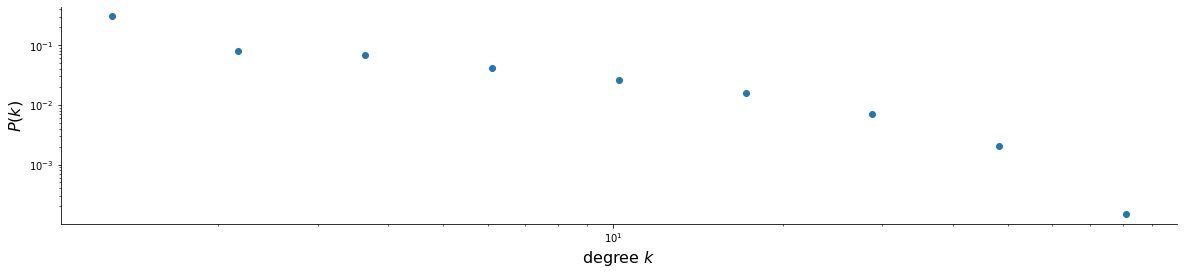

In [298]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [299]:
nx.is_connected(G)
nx.number_connected_components(G)

26